## **ANÁLISIS DESCRIPTIVO Y EXPLORATORIO**

#### **TRAYENDO DATA**


In [252]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#LEYENDO DATOS
train=pd.read_csv("C:/Users/ugad.ingenieria2/Documents/PROYECTOS/DATASETS/Marketing_Campaign.csv",sep="\t")

#### VARIABLES
* AcceptedCmp1 - 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario
* AcceptedCmp2 - 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario
* AcceptedCmp3 - 1 si el cliente aceptó la oferta en la 3ª campaña, 0 en caso contrario
* AcceptedCmp4 - 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario
* AcceptedCmp5 - 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario.
* Response - 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario
* Complain: 1 si el cliente se ha quejado en los últimos 2 años.
* DtCustomer: fecha de inscripción del cliente en la empresa.
* Education: nivel educativo del cliente
* Marital: estado civil del cliente.
* Kidhome - número de niños pequeños en el hogar del cliente
* Teenhome - número de adolescentes en el hogar del cliente
* Income: ingresos anuales del hogar del cliente.
* MntFishProducts - importe gastado en productos de pescado en los últimos 2 años
* MntMeatProducts - importe gastado en productos cárnicos en los últimos 2 años
* MntFruits - importe gastado en productos de fruta en los últimos 2 años
* MntSweetProducts - importe gastado en productos dulces en los últimos 2 años
* MntWines - importe gastado en productos vinícolas en los últimos 2 años
* MntGoldProds - importe gastado en productos de oro en los últimos 2 años
* NumDealsPurchases - número de compras con descuento
* NumCatalogPurchases - número de compras por catálogo
* NumStorePurchases - número de compras realizadas directamente en tiendas
* NumWebPurchases - número de compras realizadas a través del sitio web de la empresa
* NumWebVisitsMonth - número de visitas a la página web de la empresa.
* Recency - número de días transcurridos desde la última compra.

In [253]:
#VIENDO DATOS
print(train.columns)
train.head(5)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [254]:
train.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [255]:
#VIENDO UNICOS
columns=train.columns
for i in columns:
    print(train[i].unique())


[5524 2174 4141 ... 7270 8235 9405]
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
[58138. 46344. 71613. ... 56981. 69245. 52869.]
[0 1 2]
[0 1 2]
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013'

In [256]:
#VIENDO  NULOS
train.info()
print("Valores faltantes: ", train.isna().sum().sum())


missing_values_count = train.isnull().sum() 
print(missing_values_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [257]:
#LIMPIANDO NULOS
train=train.dropna()

In [258]:
#ONE HOT ENCODING (MUCHOS UNICOS)
encoded = pd.get_dummies(train["Education"])

train = train.join(encoded)

encoded = pd.get_dummies(train["Marital_Status"])
train = train.join(encoded)

train=train.drop(["Marital_Status","Education"],axis=1)

train.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', '2n Cycle',
       'Basic', 'Graduation', 'Master', 'PhD', 'Absurd', 'Alone', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'YOLO'],
      dtype='object')

In [259]:
train.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.164711,0.217058,0.000903,0.001354,0.104693,0.386733,0.212545,0.258574,0.034296,0.000903
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.371003,0.412335,0.030035,0.036777,0.306227,0.487112,0.409201,0.437950,0.182030,0.030035
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


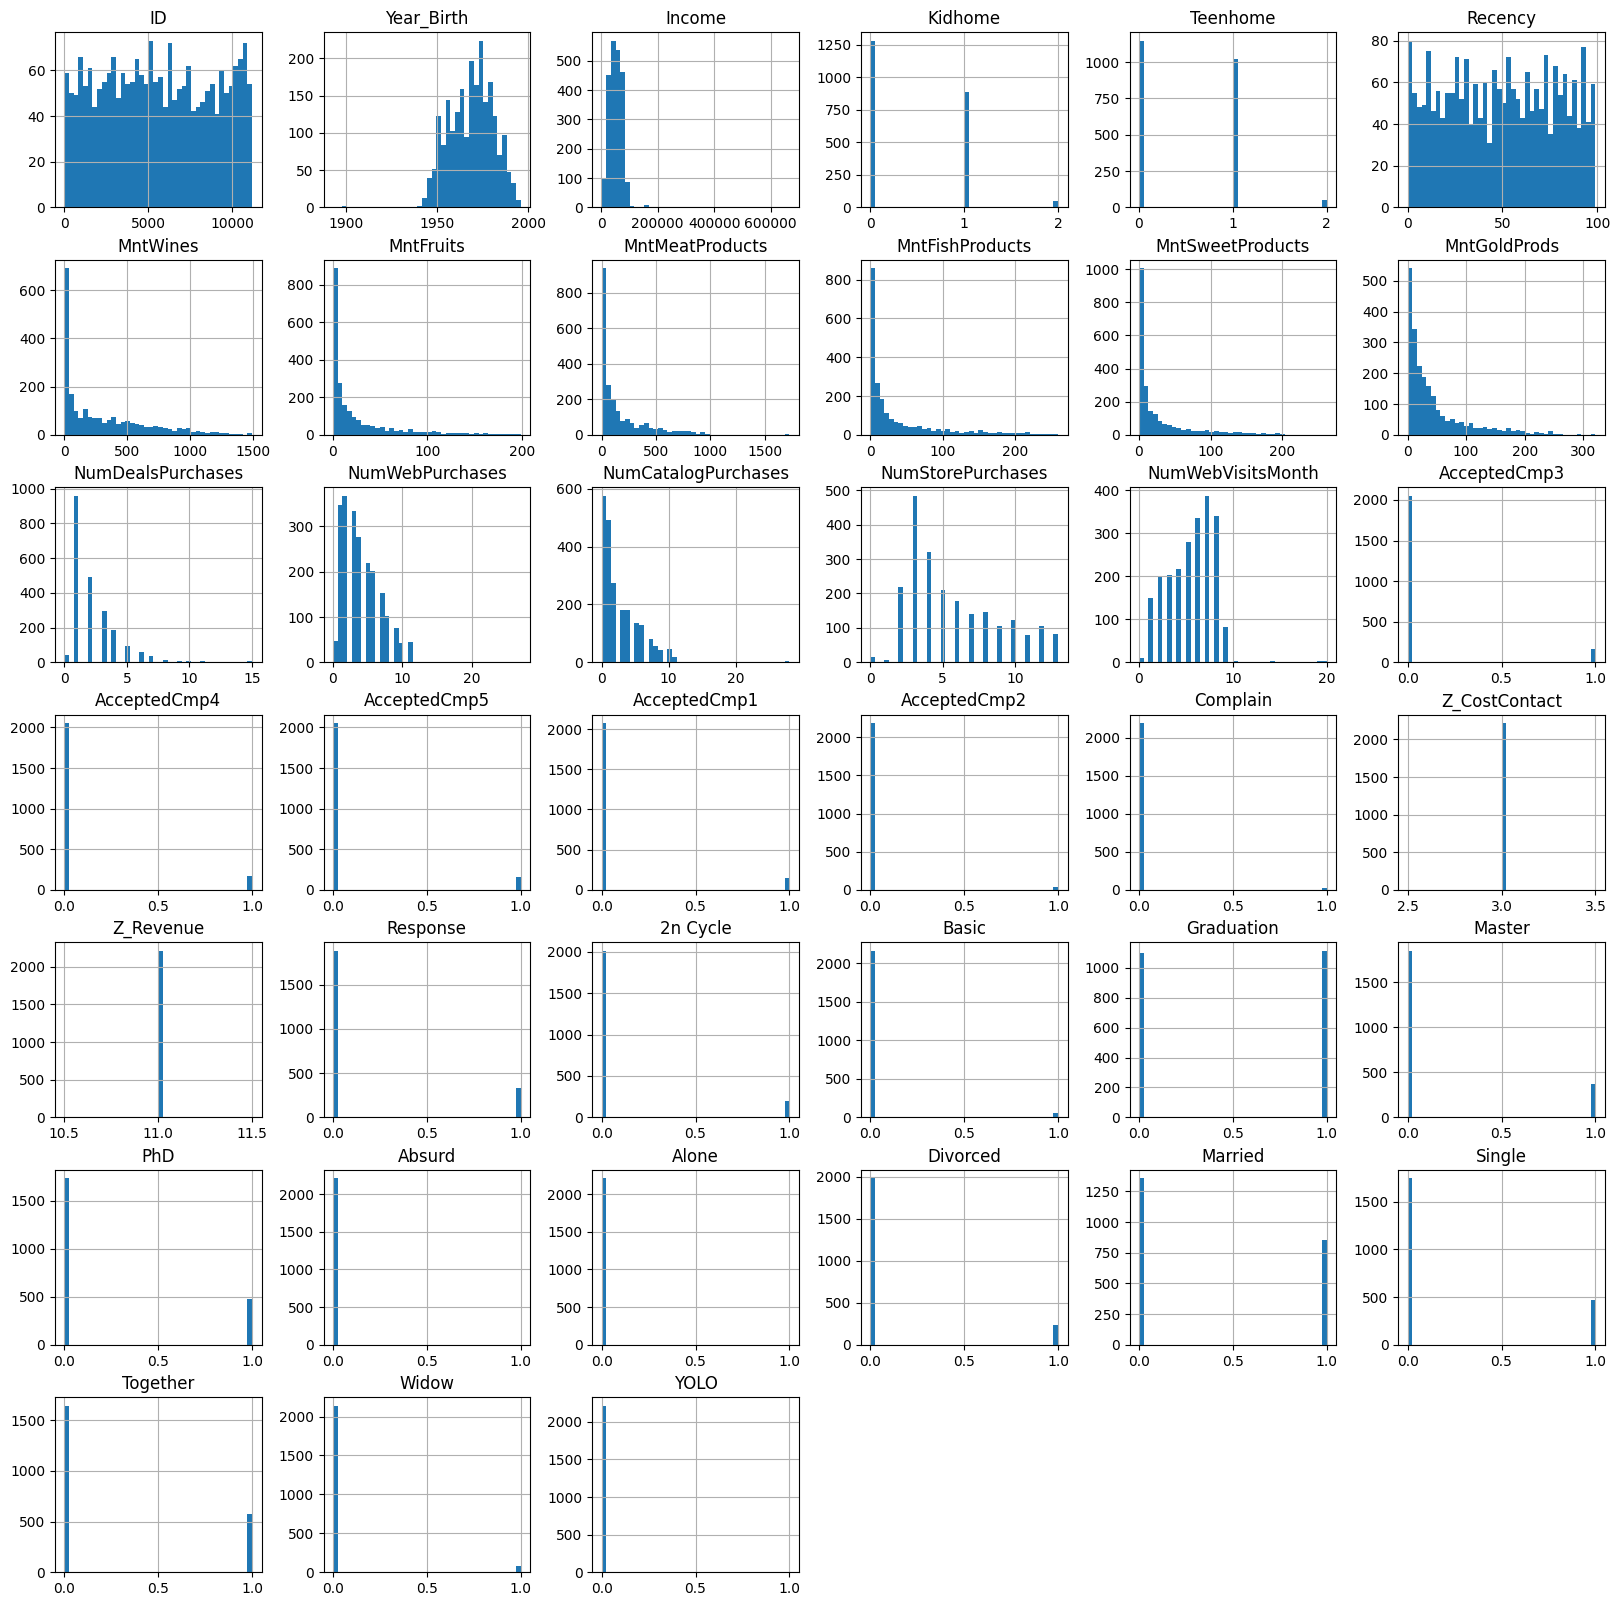

In [260]:
import matplotlib.pyplot as plt
train.hist(bins=40, figsize=(20,20))
plt.show()
#PODEMOS VER QUE LA GRÁFICA DEL PRECIO, TIENE UNA DISTRIBUCIÓN QUE DETALLAREMOS MÁS ADELANTE

C:\Users\ugad.ingenieria2\AppData\Local\Temp\ipykernel_12560\24678655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train["Income"])


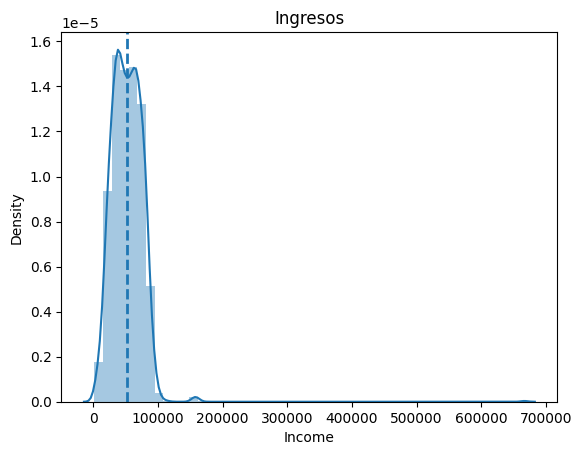

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.distplot(train["Income"])
ax.axvline(train["Income"].mean(), linestyle='--', linewidth=2)
plt.title('Ingresos');

#GRAFICAREMOS A DETALLE LA GRAFICA DEL PRECIO PARA VER SU DISTRIBUCION Y QUE ES ASIMETRICA POSITIVA. 

FALTA CDF, lo que hice ya incluye pdf y kde

C:\Users\ugad.ingenieria2\AppData\Local\Temp\ipykernel_12560\2290119558.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion=correlacion.corr().round(2)


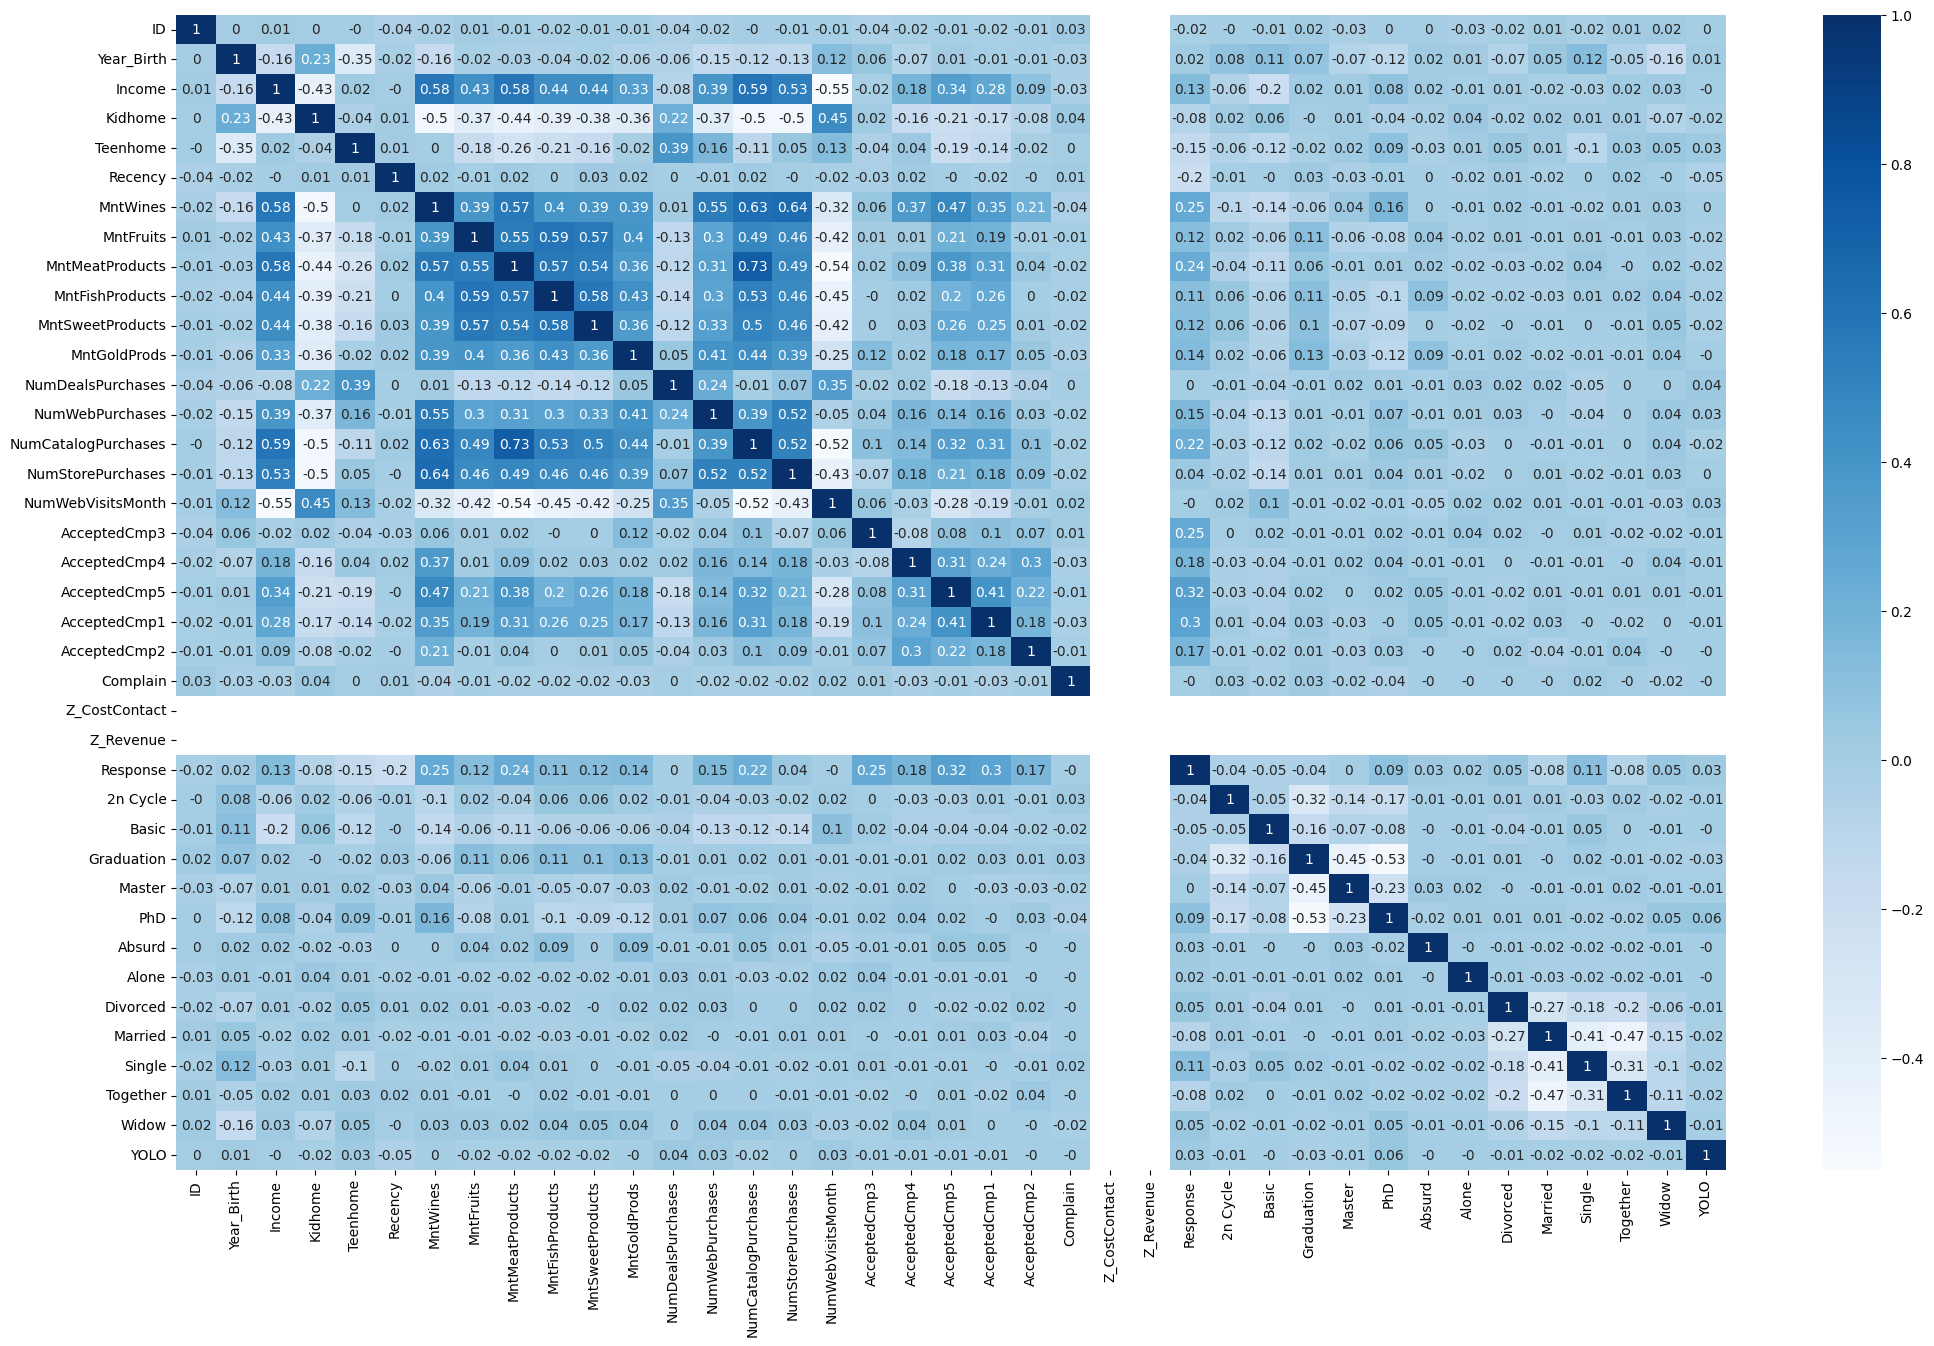

In [262]:

import seaborn as sns
correlacion = train
correlacion=correlacion.corr().round(2)
#correlacion = correlacion.loc[:,["Income"]]
#correlacion = correlacion.sort_values(by="Income", ascending=False)
fig, ax = plt.subplots(figsize=(25,15))
ax=sns.heatmap(correlacion, annot=True,cmap="Blues")



#### ESTABLECEMOS LAS VARIABLES

In [263]:
#ELIMINAMOS LAS VARIABLES QUE NO TIENEN USO
train=train.drop(["ID","Dt_Customer"],axis=1)

#ESTABLECEMOS LA VARIABLE OBJETIVO Y LAS VARIABLES DEPENDIENTES
y=train["Income"]
X=train.drop("Income", axis=1)


## **ANÁLISIS DE SELECCIÓN DE CARACTERISTICAS**

#### **SELECCIONANDO VARIABLES POR CORRELACIÓN**

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
RMSE_ANTES = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE ANTES DE LA SELECCIÓN POR CORRELACIÓN: "+str(RMSE_ANTES))

X=X.drop(['Z_CostContact', 'Z_Revenue'],axis=1)

#APLICAMOS NUEVAMENTE EL MODELO

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
RMSE_CORRELA = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE DESPUES DE LA SELECCIÓN POR CORRELACIÓN: "+str(RMSE_CORRELA))

RMSE ANTES DE LA SELECCIÓN POR CORRELACIÓN: 11115.123366810534
RMSE DESPUES DE LA SELECCIÓN POR CORRELACIÓN: 11115.123366810534


#### **SELECCIONANDO VARIABLES CON RFE**

In [265]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# CREAMOS UN OBJETO DE REGRESIÓN LINEAL
modelo = LinearRegression()

Lista_RMSE = []
Posicion_RMSE = []
elementos=len(X.columns)


#COMENZAREMOS A ITERAR PARA VER CON QUE CANTIDAD DE VARIABLES SE TIENE EL MENOR RMSE
for i in range(elementos):
    # CREAMOS UN OBJETO RFE PARA SELECCIONAR n CARACTERÍSTICAS
    rfe = RFE(modelo,n_features_to_select=i+1)

    # AJUSTAMOS EL MODELO RFE AL CONJUNTO DE DATOS
    X_rfe = rfe.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rfe, y,test_size=0.3,random_state=42)

    #ENTRENAMOS EL NUEVO MODELO
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    Lista_RMSE.append(rmse)
    print("Con "+str(i+1)+" variables se obtiene un RMSE de "+str(rmse))
    extra=i+1
    Posicion_RMSE.append(extra)

posicion=pd.Series(Lista_RMSE).idxmin()
RMSE_RFE=min(Lista_RMSE)
cant_var_usar=Posicion_RMSE[posicion]

#ESTA VEZ APLCIAREMOS OTRA VEZ RFE PERO PARA PODER EXTRAER LAS VARIABLES A FILTRAR
rfe = RFE(modelo,n_features_to_select=cant_var_usar)
X_rfe = rfe.fit_transform(X, y)
cabeceras_nuevas=X.columns[(rfe.get_support())]

X=X[cabeceras_nuevas]

#APLICAMOS EL MODELO 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
ACC_NUEVO = np.sqrt(mean_squared_error(y_test, y_pred))
print("LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE: ",cant_var_usar)

print("VARIABLES SELECCIONADAS POR RFE: ",cabeceras_nuevas)
print("RMSE DESPUES DEL RFE: "+str(ACC_NUEVO))

Con 1 variables se obtiene un RMSE de 19824.689854798813
Con 2 variables se obtiene un RMSE de 19244.927295082103
Con 3 variables se obtiene un RMSE de 18743.660005874346
Con 4 variables se obtiene un RMSE de 18690.035017666927
Con 5 variables se obtiene un RMSE de 18690.14252389777
Con 6 variables se obtiene un RMSE de 18690.079118539685
Con 7 variables se obtiene un RMSE de 15010.880987738485
Con 8 variables se obtiene un RMSE de 14782.872921031625
Con 9 variables se obtiene un RMSE de 14782.161920985964
Con 10 variables se obtiene un RMSE de 13227.205429357036
Con 11 variables se obtiene un RMSE de 13215.58130259544
Con 12 variables se obtiene un RMSE de 13226.264019373994
Con 13 variables se obtiene un RMSE de 13228.710122458782
Con 14 variables se obtiene un RMSE de 12352.574199321669
Con 15 variables se obtiene un RMSE de 12351.321212003508
Con 16 variables se obtiene un RMSE de 12392.170263590839
Con 17 variables se obtiene un RMSE de 11984.871716652862
Con 18 variables se obtie

#### **SELECCIONANDO VARIABLES CON LASSO REGRESION**

In [266]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#utilizar LassoCV para seleccionar variables
reg = LassoCV(cv=5)
reg.fit(X_train, y_train)

coef = pd.Series(reg.coef_, index = X_train.columns)
LASSO_VARS=coef[coef!=0].index.tolist()

print("VARIABLES SELECCIONADAS POR LASSO REGRESIÓN: ",LASSO_VARS)

# Usar solo las variables seleccionadas para entrenar el modelo y de esta forma para no asignar aún al X original porque el RMSE puede subir
X_train, X_test, y_train, y_test = train_test_split(X[LASSO_VARS], y, test_size=0.3, random_state=42)

# Entrenar un modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcular el RMSE y el MAE de la regresión lineal
LASSO_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE DESPUES DE LA SELECCIÓN DE VARIABLES POR LASSO REGRESIÓN: ", LASSO_RMSE)


#ESTABLECEMOS LAS VARIABLES FINALES A USAR EN LA DATA
if LASSO_RMSE<ACC_NUEVO:
    X=X[LASSO_VARS]
    print("SE CAMBIA EL RMSE ANTERIOR")
else:
    print("SE MANTIENE EL RMSE ANTERIOR")


VARIABLES SELECCIONADAS POR LASSO REGRESIÓN:  ['Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumWebVisitsMonth']
RMSE DESPUES DE LA SELECCIÓN DE VARIABLES POR LASSO REGRESIÓN:  11549.36972210331
SE MANTIENE EL RMSE ANTERIOR


#### **ITERANDO TODOS LOS MODELOS QUE SE ADAPTAN A NUESTRO PROBLEMA PARA HALLAR EL MEJOR**

In [267]:
# YA CON LA DATA TRANSFORMADA, PROCEDEREMOS A ITERAR LOS MODELOS QUE SE AJUSTEN A NUESTRO PROBLEMA PARA ENCONTRAR EL MEJOR

from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_predict
import numpy as np

#ESTABLECEMOS LOS DATOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


modelos = {
    'SVR':SVR(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    "RANSACRegressor":RANSACRegressor(),
    "GradienBoostRegressor":GradientBoostingRegressor(),
    "XgboostRegressor":xgb.XGBRegressor(),
    "NeuralNetworkRegressor": MLPRegressor(),
    "LightGbmRegressor":lgb.LGBMRegressor(),
}

#CREANDO LAS LISTAS
modelo_resultado = []
modelo_nombre = []

# ENTRENANDO EL MODELO
for nombre,modelo in modelos.items():
    a = modelo.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    modelo_resultado.append(score)
    modelo_nombre.append(nombre)
    
    #CREANDO LA LISTA DE RESULTADOS
    df_resultados = pd.DataFrame([modelo_nombre,modelo_resultado])
    df_resultados = df_resultados.transpose()
    df_resultados = df_resultados.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_resultados)

RMSE_TOPMODELO=df_resultados["RMSE"].min()
df_resultados=df_resultados.reset_index()
df_resultados=df_resultados.drop("index", axis=1)
df_resultados=df_resultados.set_index("RMSE")
df_resultados.index.get_loc(RMSE_TOPMODELO)
df_resultados=df_resultados.iloc[11,0]
print("EL MEJOR MODELO PARA EL PROBLEMA ES: "+ df_resultados)
print("RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: "+str(RMSE_TOPMODELO))

                     Model                 RMSE
3             SGDRegressor  1850797868004756.25
0                      SVR         21273.369617
8    GradienBoostRegressor         13991.843184
9         XgboostRegressor         13421.853541
10  NeuralNetworkRegressor         13310.330453
7          RANSACRegressor          11332.19452
2               ElasticNet         11328.524626
4            BayesianRidge         11198.284525
5         LinearRegression         11088.590268
1                    Ridge          11085.12782
11       LightGbmRegressor         10839.846698
6    RandomForestRegressor         10155.195186
EL MEJOR MODELO PARA EL PROBLEMA ES: RandomForestRegressor
RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: 10155.195186393577


c:\Users\ugad.ingenieria2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### **REALIZAMOS LA VALIDACIÓN DEL MODELO**

In [268]:
#CREAREMOS EL MODELO GANADOR
modelo=modelos[df_resultados]

#PROCEDEREMOS A REALIZAR LA VALIDACIÓN CRUZADA PARA COMPARAR LOS RMSE
prediccion = cross_val_predict(modelo, X, y, cv=3)
RMSE_TEST = np.sqrt(mean_squared_error(y, prediccion))

#VEMOS QUE LA DIFERENCIA DE RMSE NO ES TAN GRANDE, LO QUE INDICA QUE NUESTRO MODELO ESTÁ EN BUEN CAMINO
APRUEBA=RMSE_TOPMODELO-RMSE_TEST
print("El RMSE DEL TRAIN ES: "+str(RMSE_TOPMODELO))
print("El RMSE DEL TEST ES: "+str(RMSE_TEST))
print("LA DIFERENCIA DE AMBOS ES: "+str(APRUEBA))



El RMSE DEL TRAIN ES: 10155.195186393577
El RMSE DEL TEST ES: 17715.021960349426
LA DIFERENCIA DE AMBOS ES: -7559.826773955849
